In [1]:
import act
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from scipy.stats import linregress
import pandas as pd

In [2]:
all_intercepts = {}
all_slopes = {}
all_r2_vals = {}

# S20

In [16]:
months = ['February', 'March', 'April']

# ARM username and token credentials
username = 'cdeng'
token = '7e2e6e7f22c45655'

In [4]:
intercepts = []
slopes = []
r2_vals = []

for month in months:        
    if month == 'February':
        # Special case for February due to missing data, start at the 7th of the month
        startdate = pd.to_datetime(f'{2025}-02-07 00:00:00')

    else:
        # Start date for current month
        startdate = pd.to_datetime(f'{2025}-{month}-01 00:00:00')
    
    # End date for current month
    enddate = pd.to_datetime(f'{2025}-{month}-01') + pd.DateOffset(months=1) - pd.Timedelta(seconds=1)
    
    startdate_str = startdate.strftime('%Y-%m-%dT%H:%M:%S')
    enddate_str = enddate.strftime('%Y-%m-%dT%H:%M:%S')

    # Download ECOR data
    datastream = 'bnfecorsfS20.b1'
    result_ecor = act.discovery.download_arm_data(username, token, datastream, startdate_str, enddate_str)
    ds_ecor = act.io.read_arm_netcdf(result_ecor)

    # Download SEBS data
    datastream = 'bnfsebsS20.b1'
    result_sebs = act.discovery.download_arm_data(username, token, datastream, startdate_str, enddate_str)
    ds_sebs = act.io.read_arm_netcdf(result_sebs)

    # Download SIRS data
    datastream = 'bnfsirsS20.b1'
    result_sirs = act.discovery.download_arm_data(username, token, datastream, startdate_str, enddate_str)
    ds_sirs = act.io.read_arm_netcdf(result_sirs)

    # Calculate EBR
    LE = ds_ecor['latent_flux']
    H = ds_ecor['sensible_heat_flux']
    RN = (ds_sirs['down_long_hemisp1'] + ds_sirs['down_short_hemisp']) - (ds_sirs['up_long_hemisp'] + ds_sirs['up_short_hemisp'])
    G = ds_sebs['surface_soil_heat_flux_avg']

    turbulent_flux = LE + H
    available_energy = RN - G

    valid_times = np.intersect1d(turbulent_flux.time.values, available_energy.time.values)

    turbulent_flux_valid = turbulent_flux.sel(time=valid_times)
    available_energy_valid = available_energy.sel(time=valid_times)
    
    mask = (~np.isnan(turbulent_flux_valid)).compute() & (~np.isnan(available_energy_valid)).compute()
    turbulent_flux_clean = turbulent_flux_valid.where(mask, drop=True)
    available_energy_clean = available_energy_valid.where(mask, drop=True)

    slope, intercept, r, p, std_err = linregress(available_energy_clean, turbulent_flux_clean)
    
    intercepts = intercepts + [intercept]
    slopes = slopes + [slope]
    r2_vals = r2_vals + [r**2]

    all_intercepts['S20'] = intercepts
    all_slopes['S20'] = slopes
    all_r2_vals['S20'] = r2_vals

[DOWNLOADING] bnfecorsfS20.b1.20250227.000000.nc
[DOWNLOADING] bnfecorsfS20.b1.20250223.000000.nc
[DOWNLOADING] bnfecorsfS20.b1.20250220.000000.nc
[DOWNLOADING] bnfecorsfS20.b1.20250219.000000.nc
[DOWNLOADING] bnfecorsfS20.b1.20250222.000000.nc
[DOWNLOADING] bnfecorsfS20.b1.20250225.000000.nc
[DOWNLOADING] bnfecorsfS20.b1.20250211.000000.nc
[DOWNLOADING] bnfecorsfS20.b1.20250226.000000.nc
[DOWNLOADING] bnfecorsfS20.b1.20250218.000000.nc
[DOWNLOADING] bnfecorsfS20.b1.20250221.000000.nc
[DOWNLOADING] bnfecorsfS20.b1.20250207.000000.nc
[DOWNLOADING] bnfecorsfS20.b1.20250210.000000.nc
[DOWNLOADING] bnfecorsfS20.b1.20250208.000000.nc
[DOWNLOADING] bnfecorsfS20.b1.20250215.000000.nc
[DOWNLOADING] bnfecorsfS20.b1.20250213.000000.nc
[DOWNLOADING] bnfecorsfS20.b1.20250228.000000.nc
[DOWNLOADING] bnfecorsfS20.b1.20250214.000000.nc
[DOWNLOADING] bnfecorsfS20.b1.20250217.000000.nc
[DOWNLOADING] bnfecorsfS20.b1.20250216.000000.nc
[DOWNLOADING] bnfecorsfS20.b1.20250212.000000.nc
[DOWNLOADING] bnfeco

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


[DOWNLOADING] bnfsebsS20.b1.20250220.000000.cdf
[DOWNLOADING] bnfsebsS20.b1.20250208.000000.cdf
[DOWNLOADING] bnfsebsS20.b1.20250213.000000.cdf
[DOWNLOADING] bnfsebsS20.b1.20250214.000000.cdf
[DOWNLOADING] bnfsebsS20.b1.20250207.000000.cdf
[DOWNLOADING] bnfsebsS20.b1.20250210.000000.cdf
[DOWNLOADING] bnfsebsS20.b1.20250209.000000.cdf
[DOWNLOADING] bnfsebsS20.b1.20250217.000000.cdf
[DOWNLOADING] bnfsebsS20.b1.20250212.000000.cdf
[DOWNLOADING] bnfsebsS20.b1.20250219.000000.cdf
[DOWNLOADING] bnfsebsS20.b1.20250223.000000.cdf
[DOWNLOADING] bnfsebsS20.b1.20250225.000000.cdf
[DOWNLOADING] bnfsebsS20.b1.20250216.000000.cdf
[DOWNLOADING] bnfsebsS20.b1.20250211.000000.cdf
[DOWNLOADING] bnfsebsS20.b1.20250218.003000.cdf
[DOWNLOADING] bnfsebsS20.b1.20250227.000000.cdf
[DOWNLOADING] bnfsebsS20.b1.20250221.000000.cdf
[DOWNLOADING] bnfsebsS20.b1.20250226.000000.cdf
[DOWNLOADING] bnfsebsS20.b1.20250215.000000.cdf
[DOWNLOADING] bnfsebsS20.b1.20250228.003000.cdf
[DOWNLOADING] bnfsebsS20.b1.20250224.000

# S30

In [5]:
intercepts = []
slopes = []
r2_vals = []

for month in months:        
    if month == 'February':
        # Special case for February due to missing data, start at the 7th of the month
        startdate = pd.to_datetime(f'{2025}-02-07 00:00:00')

    else:
        # Start date for current month
        startdate = pd.to_datetime(f'{2025}-{month}-01 00:00:00')
    
    # End date for current month
    enddate = pd.to_datetime(f'{2025}-{month}-01') + pd.DateOffset(months=1) - pd.Timedelta(seconds=1)
    
    startdate_str = startdate.strftime('%Y-%m-%dT%H:%M:%S')
    enddate_str = enddate.strftime('%Y-%m-%dT%H:%M:%S')

    # Download ECOR data
    datastream = 'bnfecorsfS30.b1'
    result_ecor = act.discovery.download_arm_data(username, token, datastream, startdate_str, enddate_str)
    ds_ecor = act.io.read_arm_netcdf(result_ecor)

    # Download SEBS data
    datastream = 'bnfsebsS30.b1'
    result_sebs = act.discovery.download_arm_data(username, token, datastream, startdate_str, enddate_str)
    ds_sebs = act.io.read_arm_netcdf(result_sebs)

    # Download SIRS data
    datastream = 'bnfsirsS30.b1'
    result_sirs = act.discovery.download_arm_data(username, token, datastream, startdate_str, enddate_str)
    ds_sirs = act.io.read_arm_netcdf(result_sirs)

    # Calculate EBR
    LE = ds_ecor['latent_flux']
    H = ds_ecor['sensible_heat_flux']
    RN = (ds_sirs['down_long_hemisp1'] + ds_sirs['down_short_hemisp']) - (ds_sirs['up_long_hemisp'] + ds_sirs['up_short_hemisp'])
    G = ds_sebs['surface_soil_heat_flux_avg']

    turbulent_flux = LE + H
    available_energy = RN - G

    valid_times = np.intersect1d(turbulent_flux.time.values, available_energy.time.values)

    turbulent_flux_valid = turbulent_flux.sel(time=valid_times)
    available_energy_valid = available_energy.sel(time=valid_times)
    
    mask = (~np.isnan(turbulent_flux_valid)).compute() & (~np.isnan(available_energy_valid)).compute()
    turbulent_flux_clean = turbulent_flux_valid.where(mask, drop=True)
    available_energy_clean = available_energy_valid.where(mask, drop=True)

    slope, intercept, r, p, std_err = linregress(available_energy_clean, turbulent_flux_clean)
    
    intercepts = intercepts + [intercept]
    slopes = slopes + [slope]
    r2_vals = r2_vals + [r**2]

    all_intercepts['S30'] = intercepts
    all_slopes['S30'] = slopes
    all_r2_vals['S30'] = r2_vals

[DOWNLOADING] bnfecorsfS30.b1.20250213.000000.nc
[DOWNLOADING] bnfecorsfS30.b1.20250211.000000.nc
[DOWNLOADING] bnfecorsfS30.b1.20250226.000000.nc
[DOWNLOADING] bnfecorsfS30.b1.20250212.000000.nc
[DOWNLOADING] bnfecorsfS30.b1.20250221.000000.nc
[DOWNLOADING] bnfecorsfS30.b1.20250207.000000.nc
[DOWNLOADING] bnfecorsfS30.b1.20250228.000000.nc
[DOWNLOADING] bnfecorsfS30.b1.20250208.000000.nc
[DOWNLOADING] bnfecorsfS30.b1.20250210.000000.nc
[DOWNLOADING] bnfecorsfS30.b1.20250227.000000.nc
[DOWNLOADING] bnfecorsfS30.b1.20250209.000000.nc
[DOWNLOADING] bnfecorsfS30.b1.20250223.000000.nc
[DOWNLOADING] bnfecorsfS30.b1.20250214.000000.nc
[DOWNLOADING] bnfecorsfS30.b1.20250224.000000.nc
[DOWNLOADING] bnfecorsfS30.b1.20250222.000000.nc
[DOWNLOADING] bnfecorsfS30.b1.20250220.000000.nc
[DOWNLOADING] bnfecorsfS30.b1.20250225.000000.nc
[DOWNLOADING] bnfecorsfS30.b1.20250218.000000.nc
[DOWNLOADING] bnfecorsfS30.b1.20250215.000000.nc
[DOWNLOADING] bnfecorsfS30.b1.20250217.000000.nc
[DOWNLOADING] bnfeco

# S40

In [6]:
intercepts = []
slopes = []
r2_vals = []

for month in months:        
    if month == 'February':
        # Special case for February due to missing data, start at the 7th of the month
        startdate = pd.to_datetime(f'{2025}-02-07 00:00:00')

    else:
        # Start date for current month
        startdate = pd.to_datetime(f'{2025}-{month}-01 00:00:00')
    
    # End date for current month
    enddate = pd.to_datetime(f'{2025}-{month}-01') + pd.DateOffset(months=1) - pd.Timedelta(seconds=1)
    
    startdate_str = startdate.strftime('%Y-%m-%dT%H:%M:%S')
    enddate_str = enddate.strftime('%Y-%m-%dT%H:%M:%S')

    # Download ECOR data
    datastream = 'bnfecorsfS40.b1'
    result_ecor = act.discovery.download_arm_data(username, token, datastream, startdate_str, enddate_str)
    ds_ecor = act.io.read_arm_netcdf(result_ecor)

    # Download SEBS data
    datastream = 'bnfsebsS40.b1'
    result_sebs = act.discovery.download_arm_data(username, token, datastream, startdate_str, enddate_str)
    ds_sebs = act.io.read_arm_netcdf(result_sebs)

    # Download SIRS data
    datastream = 'bnfsirsS40.b1'
    result_sirs = act.discovery.download_arm_data(username, token, datastream, startdate_str, enddate_str)
    ds_sirs = act.io.read_arm_netcdf(result_sirs)

    # Calculate EBR
    LE = ds_ecor['latent_flux']
    H = ds_ecor['sensible_heat_flux']
    RN = (ds_sirs['down_long_hemisp1'] + ds_sirs['down_short_hemisp']) - (ds_sirs['up_long_hemisp'] + ds_sirs['up_short_hemisp'])
    G = ds_sebs['surface_soil_heat_flux_avg']

    turbulent_flux = LE + H
    available_energy = RN - G

    valid_times = np.intersect1d(turbulent_flux.time.values, available_energy.time.values)

    turbulent_flux_valid = turbulent_flux.sel(time=valid_times)
    available_energy_valid = available_energy.sel(time=valid_times)
    
    mask = (~np.isnan(turbulent_flux_valid)).compute() & (~np.isnan(available_energy_valid)).compute()
    turbulent_flux_clean = turbulent_flux_valid.where(mask, drop=True)
    available_energy_clean = available_energy_valid.where(mask, drop=True)

    slope, intercept, r, p, std_err = linregress(available_energy_clean, turbulent_flux_clean)
    
    intercepts = intercepts + [intercept]
    slopes = slopes + [slope]
    r2_vals = r2_vals + [r**2]

    all_intercepts['S40'] = intercepts
    all_slopes['S40'] = slopes
    all_r2_vals['S40'] = r2_vals

[DOWNLOADING] bnfecorsfS40.b1.20250226.000000.nc
[DOWNLOADING] bnfecorsfS40.b1.20250212.233000.nc
[DOWNLOADING] bnfecorsfS40.b1.20250217.000000.nc
[DOWNLOADING] bnfecorsfS40.b1.20250228.000000.nc
[DOWNLOADING] bnfecorsfS40.b1.20250225.000000.nc
[DOWNLOADING] bnfecorsfS40.b1.20250218.000000.nc
[DOWNLOADING] bnfecorsfS40.b1.20250213.000000.nc
[DOWNLOADING] bnfecorsfS40.b1.20250222.000000.nc
[DOWNLOADING] bnfecorsfS40.b1.20250219.000000.nc
[DOWNLOADING] bnfecorsfS40.b1.20250208.000000.nc
[DOWNLOADING] bnfecorsfS40.b1.20250214.000000.nc
[DOWNLOADING] bnfecorsfS40.b1.20250220.000000.nc
[DOWNLOADING] bnfecorsfS40.b1.20250211.000000.nc
[DOWNLOADING] bnfecorsfS40.b1.20250221.000000.nc
[DOWNLOADING] bnfecorsfS40.b1.20250209.000000.nc
[DOWNLOADING] bnfecorsfS40.b1.20250223.000000.nc
[DOWNLOADING] bnfecorsfS40.b1.20250224.000000.nc
[DOWNLOADING] bnfecorsfS40.b1.20250227.000000.nc
[DOWNLOADING] bnfecorsfS40.b1.20250207.000000.nc
[DOWNLOADING] bnfecorsfS40.b1.20250212.000000.nc
[DOWNLOADING] bnfeco

# Results

In [7]:
all_intercepts

{'S20': [26.352795561796047, 30.25208435241732, 30.519283608856888],
 'S30': [35.146295368521216, 33.06873089711822, 31.567940939269107],
 'S40': [33.47054713501063, 34.36945599546751, 36.84729983183904]}

In [8]:
all_slopes

{'S20': [0.41569085989398497, 0.478425282529127, 0.514605399583416],
 'S30': [0.3975152261894841, 0.4735553734865053, 0.5744679104491098],
 'S40': [0.39289707953647585, 0.4499733453191598, 0.5045222654043898]}

In [9]:
all_r2_vals

{'S20': [0.43950997930750424, 0.7620089585312603, 0.8500267271193259],
 'S30': [0.6508404554618208, 0.8141033339238529, 0.8777313469299314],
 'S40': [0.7842959876678695, 0.8956026873884324, 0.8501105291876425]}

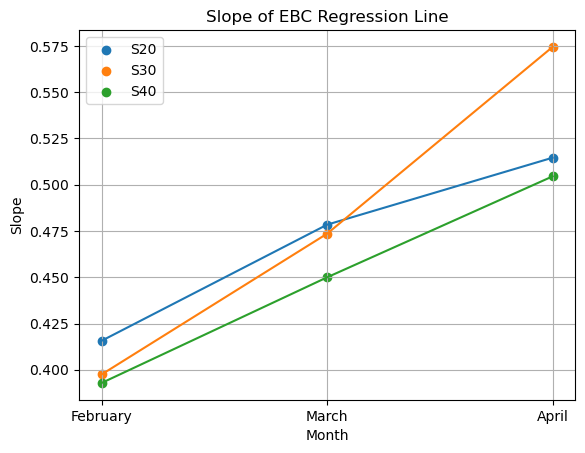

In [12]:
# Create scatter plot for each site
fig, ax = plt.subplots()

for site, values in all_slopes.items():
    ax.scatter(months, values, label=site)
    ax.plot(months, values)

ax.set_xlabel("Month")
ax.set_ylabel("Slope")
ax.set_title("Slope of EBC Regression Line")

ax.legend()
ax.grid(True)

In [30]:
# Create DataFrames with sites as index and months as columns
df_intercept = pd.DataFrame(all_intercepts, index=months).T
df_slope = pd.DataFrame(all_slopes, index=months).T
df_r2 = pd.DataFrame(all_r2_vals, index=months).T

# Create columns MultiIndex: outer=site, inner=month
columns = pd.MultiIndex.from_product([df_intercept.index, months])

# Prepare data in order: for each site, for each month
data = []
for metric_df in [df_intercept, df_slope, df_r2]:
    vals = []
    for site in df_intercept.index:
        for month in months:
            vals.append(metric_df.loc[site, month])
    data.append(vals)

df = pd.DataFrame(data, columns=columns, index=['intercept', 'slope', 'r2'])
df

S20                              S30                        \
            February      March      April   February      March      April   
intercept  26.352796  30.252084  30.519284  35.146295  33.068731  31.567941   
slope       0.415691   0.478425   0.514605   0.397515   0.473555   0.574468   
r2          0.439510   0.762009   0.850027   0.650840   0.814103   0.877731   

                 S40                        
            February      March      April  
intercept  33.470547  34.369456  36.847300  
slope       0.392897   0.449973   0.504522  
r2          0.784296   0.895603   0.850111

# Look at Eddy data (EC @ S10)

In [24]:
ec_data = pd.read_csv('/data/home/cdeng/land-atmosphere-interaction/notebooks/eddypro_43m_fluxnet_2025-05-14T083625_adv.csv')
ec_data

,TIMESTAMP_START,TIMESTAMP_END,DOY_START,DOY_END,FILENAME_HF,SW_IN_POT,NIGHT,EXPECT_NR,FILE_NR,CUSTOM_FILTER_NR,...,BADM_INST_GA_CP_TUBE_FLOW_RATE_GA_NONE,HPATH_GA_NONE,VPATH_GA_NONE,RESPONSE_TIME_GA_NONE,NUM_CUSTOM_VARS,CUSTOM_SIGNALSTR_MEAN,CUSTOM_AIR_P_MEAN,CUSTOM_AIR_T_MEAN,CUSTOM_CH4_RSSI_MEAN,NUM_BIOMET_VARS
0,202504180000,202504180030,108.0000,108.0208,FAS.00.20250418.000000.dat,0.00,1,18000,18000,18000,...,-9999,-9999,-9999,-9999,4,102.109,97759.7,297.232,28.9444,0
1,202504180030,202504180100,108.0208,108.0416,FAS.00.20250418.000000.dat,0.00,1,18000,18000,18000,...,-9999,-9999,-9999,-9999,4,102.143,97767.7,296.385,28.1340,0
2,202504180100,202504180130,108.0416,108.0624,FAS.00.20250418.010000.dat,0.00,1,18000,18000,18000,...,-9999,-9999,-9999,-9999,4,102.169,97800.6,295.935,29.1432,0
3,202504180130,202504180200,108.0624,108.0833,FAS.00.20250418.010000.dat,0.00,1,18000,18000,18000,...,-9999,-9999,-9999,-9999,4,102.184,97840.4,295.542,28.3366,0
4,202504180200,202504180230,108.0833,108.1041,FAS.00.20250418.020000.dat,0.00,1,18000,18000,18000,...,-9999,-9999,-9999,-9999,4,102.218,97859.3,295.078,28.3377,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1317,202505151030,202505151100,135.4374,135.4582,not_enough_data,1213.43,0,-9999,-9999,-9999,...,-9999,-9999,-9999,-9999,-9999,-9999.000,-9999.0,-9999.000,-9999.0000,0
1318,202505151100,202505151130,135.4582,135.4790,not_enough_data,1257.59,0,-9999,-9999,-9999,...,-9999,-9999,-9999,-9999,-9999,-9999.000,-9999.0,-9999.000,-9999.0000,0
1319,202505151130,202505151200,135.4790,135.4999,not_enough_data,1284.39,0,-9999,-9999,-9999,...,-9999,-9999,-9999,-9999,-9999,-9999.000,-9999.0,-9999.000,-9999.0000,0
1320,202505151200,202505151230,135.4999,135.5207,not_enough_data,1293.38,0,-9999,-9999,-9999,...,-9999,-9999,-9999,-9999,-9999,-9999.000,-9999.0,-9999.000,-9999.0000,0


In [29]:
list(ec_data.columns)

['TIMESTAMP_START',
 'TIMESTAMP_END',
 'DOY_START',
 'DOY_END',
 'FILENAME_HF',
 'SW_IN_POT',
 'NIGHT',
 'EXPECT_NR',
 'FILE_NR',
 'CUSTOM_FILTER_NR',
 'WD_FILTER_NR',
 'SONIC_NR',
 'T_SONIC_NR',
 'CO2_NR',
 'H2O_NR',
 'CH4_NR',
 'NONE_NR',
 'TAU_NR',
 'H_NR',
 'FC_NR',
 'LE_NR',
 'FCH4_NR',
 'FNONE_NR',
 'TAU',
 'H',
 'LE',
 'ET',
 'FC',
 'FH2O',
 'FCH4',
 'FNONE',
 'TAU_RANDUNC_HF',
 'H_RANDUNC_HF',
 'LE_RANDUNC_HF',
 'ET_RANDUNC_HF',
 'FC_RANDUNC_HF',
 'FH2O_RANDUNC_HF',
 'FCH4_RANDUNC_HF',
 'FNONE_RANDUNC_HF',
 'SH_SINGLE',
 'SLE_SINGLE',
 'SET_SINGLE',
 'SC_SINGLE',
 'SH2O_SINGLE',
 'SCH4_SINGLE',
 'SNONE_SINGLE',
 'FC_VADV',
 'FH2O_VADV',
 'FCH4_VADV',
 'FNONE_VADV',
 'U_UNROT',
 'V_UNROT',
 'W_UNROT',
 'U',
 'V',
 'W',
 'WS',
 'WS_MAX',
 'WD',
 'WD_SIGMA',
 'USTAR',
 'TKE',
 'MO_LENGTH',
 'ZL',
 'BOWEN',
 'TSTAR',
 'T_SONIC',
 'TA_EP',
 'PA_EP',
 'RH_EP',
 'AIR_MV',
 'AIR_DENSITY',
 'AIR_RHO_CP',
 'AIR_CP',
 'VAPOR_DENSITY',
 'VAPOR_PARTIAL_PRESSURE',
 'VAPOR_PARTIAL_PRESSURE_SA

In [37]:
ec_data

,TIMESTAMP_START,TIMESTAMP_END,DOY_START,DOY_END,FILENAME_HF,SW_IN_POT,NIGHT,EXPECT_NR,FILE_NR,CUSTOM_FILTER_NR,...,BADM_INST_GA_CP_TUBE_FLOW_RATE_GA_NONE,HPATH_GA_NONE,VPATH_GA_NONE,RESPONSE_TIME_GA_NONE,NUM_CUSTOM_VARS,CUSTOM_SIGNALSTR_MEAN,CUSTOM_AIR_P_MEAN,CUSTOM_AIR_T_MEAN,CUSTOM_CH4_RSSI_MEAN,NUM_BIOMET_VARS
0,202504180000,202504180030,108.0000,108.0208,FAS.00.20250418.000000.dat,0.00,1,18000,18000,18000,...,-9999,-9999,-9999,-9999,4,102.109,97759.7,297.232,28.9444,0
1,202504180030,202504180100,108.0208,108.0416,FAS.00.20250418.000000.dat,0.00,1,18000,18000,18000,...,-9999,-9999,-9999,-9999,4,102.143,97767.7,296.385,28.1340,0
2,202504180100,202504180130,108.0416,108.0624,FAS.00.20250418.010000.dat,0.00,1,18000,18000,18000,...,-9999,-9999,-9999,-9999,4,102.169,97800.6,295.935,29.1432,0
3,202504180130,202504180200,108.0624,108.0833,FAS.00.20250418.010000.dat,0.00,1,18000,18000,18000,...,-9999,-9999,-9999,-9999,4,102.184,97840.4,295.542,28.3366,0
4,202504180200,202504180230,108.0833,108.1041,FAS.00.20250418.020000.dat,0.00,1,18000,18000,18000,...,-9999,-9999,-9999,-9999,4,102.218,97859.3,295.078,28.3377,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1317,202505151030,202505151100,135.4374,135.4582,not_enough_data,1213.43,0,-9999,-9999,-9999,...,-9999,-9999,-9999,-9999,-9999,-9999.000,-9999.0,-9999.000,-9999.0000,0
1318,202505151100,202505151130,135.4582,135.4790,not_enough_data,1257.59,0,-9999,-9999,-9999,...,-9999,-9999,-9999,-9999,-9999,-9999.000,-9999.0,-9999.000,-9999.0000,0
1319,202505151130,202505151200,135.4790,135.4999,not_enough_data,1284.39,0,-9999,-9999,-9999,...,-9999,-9999,-9999,-9999,-9999,-9999.000,-9999.0,-9999.000,-9999.0000,0
1320,202505151200,202505151230,135.4999,135.5207,not_enough_data,1293.38,0,-9999,-9999,-9999,...,-9999,-9999,-9999,-9999,-9999,-9999.000,-9999.0,-9999.000,-9999.0000,0


In [49]:
ec_data = ec_data.replace(-9999, np.nan)
ec_data

,TIMESTAMP_START,TIMESTAMP_END,DOY_START,DOY_END,FILENAME_HF,SW_IN_POT,NIGHT,EXPECT_NR,FILE_NR,CUSTOM_FILTER_NR,...,BADM_INST_GA_CP_TUBE_FLOW_RATE_GA_NONE,HPATH_GA_NONE,VPATH_GA_NONE,RESPONSE_TIME_GA_NONE,NUM_CUSTOM_VARS,CUSTOM_SIGNALSTR_MEAN,CUSTOM_AIR_P_MEAN,CUSTOM_AIR_T_MEAN,CUSTOM_CH4_RSSI_MEAN,NUM_BIOMET_VARS
0,202504180000,202504180030,108.0000,108.0208,FAS.00.20250418.000000.dat,0.00,1,18000.0,18000.0,18000.0,...,NaN,NaN,NaN,NaN,4.0,102.109,97759.7,297.232,28.9444,0
1,202504180030,202504180100,108.0208,108.0416,FAS.00.20250418.000000.dat,0.00,1,18000.0,18000.0,18000.0,...,NaN,NaN,NaN,NaN,4.0,102.143,97767.7,296.385,28.1340,0
2,202504180100,202504180130,108.0416,108.0624,FAS.00.20250418.010000.dat,0.00,1,18000.0,18000.0,18000.0,...,NaN,NaN,NaN,NaN,4.0,102.169,97800.6,295.935,29.1432,0
3,202504180130,202504180200,108.0624,108.0833,FAS.00.20250418.010000.dat,0.00,1,18000.0,18000.0,18000.0,...,NaN,NaN,NaN,NaN,4.0,102.184,97840.4,295.542,28.3366,0
4,202504180200,202504180230,108.0833,108.1041,FAS.00.20250418.020000.dat,0.00,1,18000.0,18000.0,18000.0,...,NaN,NaN,NaN,NaN,4.0,102.218,97859.3,295.078,28.3377,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1317,202505151030,202505151100,135.4374,135.4582,not_enough_data,1213.43,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1318,202505151100,202505151130,135.4582,135.4790,not_enough_data,1257.59,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1319,202505151130,202505151200,135.4790,135.4999,not_enough_data,1284.39,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1320,202505151200,202505151230,135.4999,135.5207,not_enough_data,1293.38,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


<Axes: >

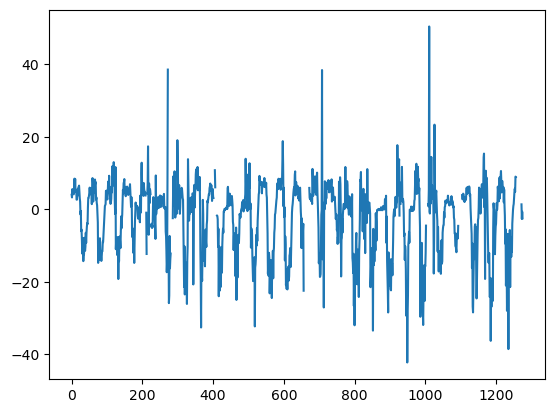

In [45]:
ec_data['FC'].plot()

<Axes: >

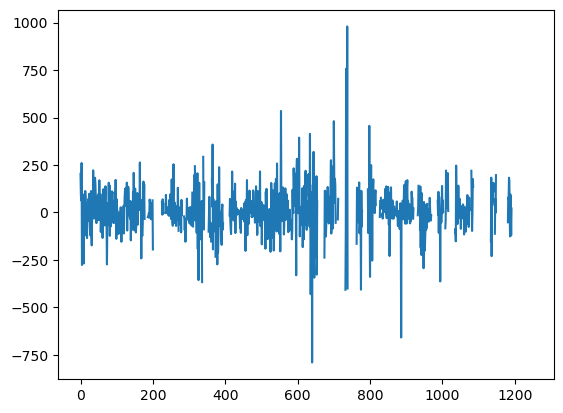

In [46]:
ec_data['FCH4'].plot()

<Axes: >

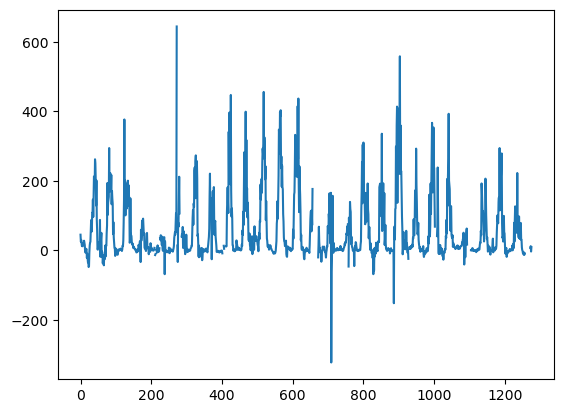

In [47]:
ec_data['LE'].plot()

<Axes: >

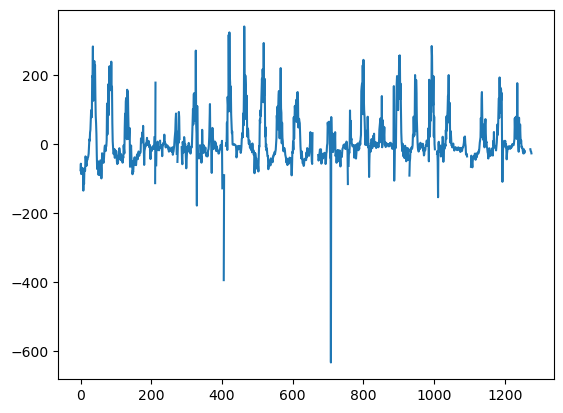

In [48]:
ec_data['H'].plot()

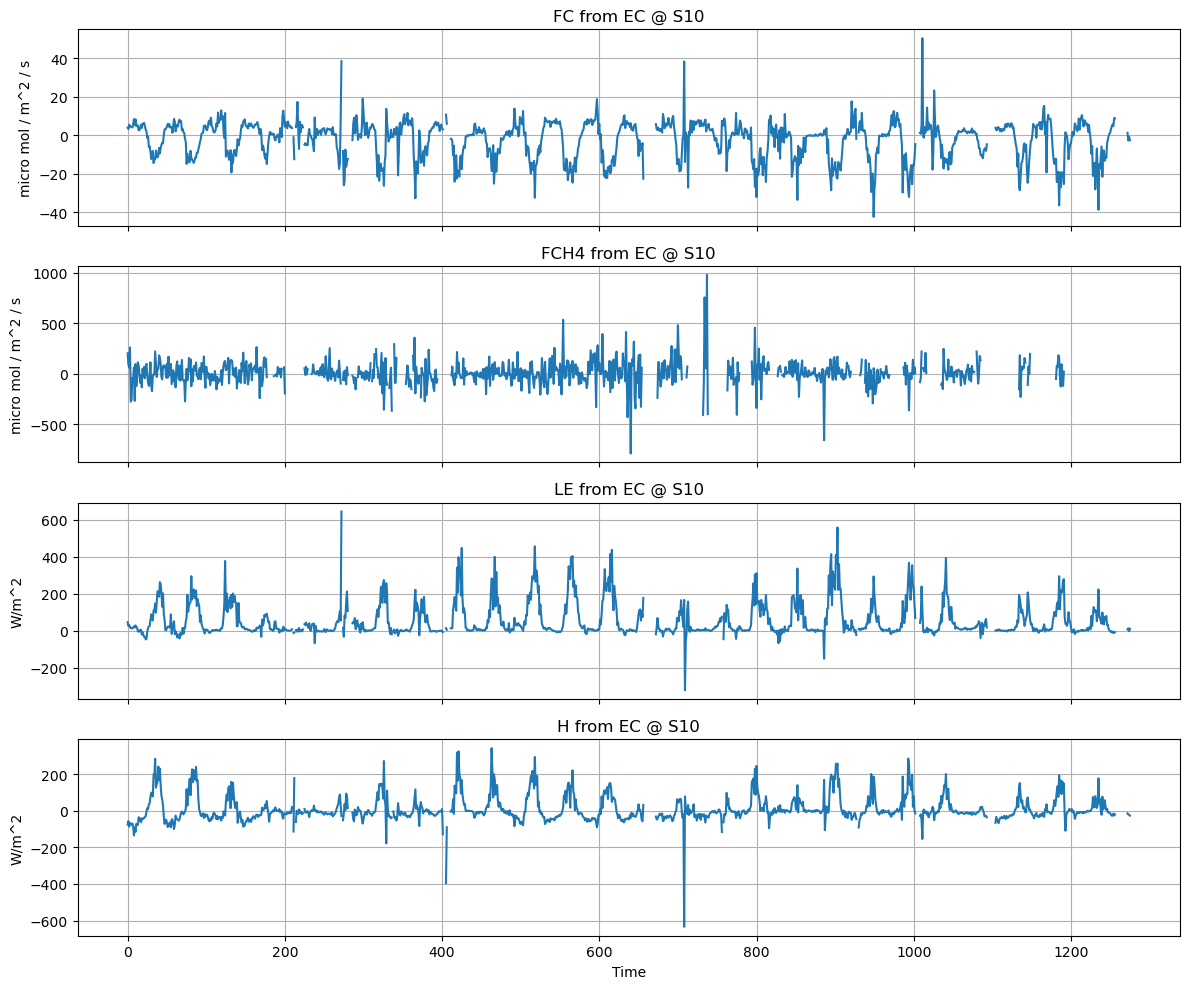

In [57]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 10), sharex=True)

# Plot each variable on its own subplot
ec_data['FC'].plot(ax=axes[0])
axes[0].set_ylabel('micro mol / m^2 / s')
axes[0].set_title('FC from EC @ S10')

ec_data['FCH4'].plot(ax=axes[1])
axes[1].set_ylabel('micro mol / m^2 / s')
axes[1].set_title('FCH4 from EC @ S10')

ec_data['LE'].plot(ax=axes[2])
axes[2].set_ylabel('W/m^2')
axes[2].set_title('LE from EC @ S10')

ec_data['H'].plot(ax=axes[3])
axes[3].set_ylabel('W/m^2')
axes[3].set_title('H from EC @ S10')
axes[3].set_xlabel('Time')

# Add gridlines and improve layout
for ax in axes:
    ax.grid(True)

plt.tight_layout()
plt.show()